In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../../dataset/heart_attack_analysis/heart.csv')

In [4]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [5]:
df.tail()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0

In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
columns = df.columns.tolist()
columns

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [9]:
print(df[df.duplicated(keep=False)])

df.drop_duplicates(inplace=True)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
163   38    1   2     138   175    0        1       173     0      0.0    2   
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
163    4      2       1  
164    4      2       1  


In [10]:
df.describe().T

count        mean        std    min     25%    50%     75%    max
age       302.0   54.420530   9.047970   29.0   48.00   55.5   61.00   77.0
sex       302.0    0.682119   0.466426    0.0    0.00    1.0    1.00    1.0
cp        302.0    0.963576   1.032044    0.0    0.00    1.0    2.00    3.0
trtbps    302.0  131.602649  17.563394   94.0  120.00  130.0  140.00  200.0
chol      302.0  246.500000  51.753489  126.0  211.00  240.5  274.75  564.0
fbs       302.0    0.149007   0.356686    0.0    0.00    0.0    0.00    1.0
restecg   302.0    0.526490   0.526027    0.0    0.00    1.0    1.00    2.0
thalachh  302.0  149.569536  22.903527   71.0  133.25  152.5  166.00  202.0
exng      302.0    0.327815   0.470196    0.0    0.00    0.0    1.00    1.0
oldpeak   302.0    1.043046   1.161452    0.0    0.00    0.8    1.60    6.2
slp       302.0    1.397351   0.616274    0.0    1.00    1.0    2.00    2.0
caa       302.0    0.718543   1.006748    0.0    0.00    0.0    1.00    4.0
thall     302.0    2.314570   0.613026    0.0    2.00    2.0    3.00    3.0
output    302.0    0.543046   0.498970    0.0    0.00    1.0    1.00    1.0

In [11]:
df.columns.tolist()

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [12]:
df_unique = {col:df[col].value_counts().shape[0] for col in df.columns.tolist()}
df_unique = pd.DataFrame(df_unique, index=["unique_count"]).transpose()
df_unique = df_unique.reset_index().rename(columns={'index':'columns'})
df_unique

columns  unique_count
0        age            41
1        sex             2
2         cp             4
3     trtbps            49
4       chol           152
5        fbs             2
6    restecg             3
7   thalachh            91
8       exng             2
9    oldpeak            40
10       slp             3
11       caa             5
12     thall             4
13    output             2

In [13]:
columns_out = ['output']
columns_con = df_unique[df_unique['unique_count'] > 10]['columns'].tolist()
columns_cat = list(set(columns) - set(columns_con) - set(columns_out))

print(f'categorical columns: {columns_cat}')
print(f'continuous columns: {columns_con}')

categorical columns: ['sex', 'cp', 'exng', 'slp', 'restecg', 'fbs', 'thall', 'caa']
continuous columns: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


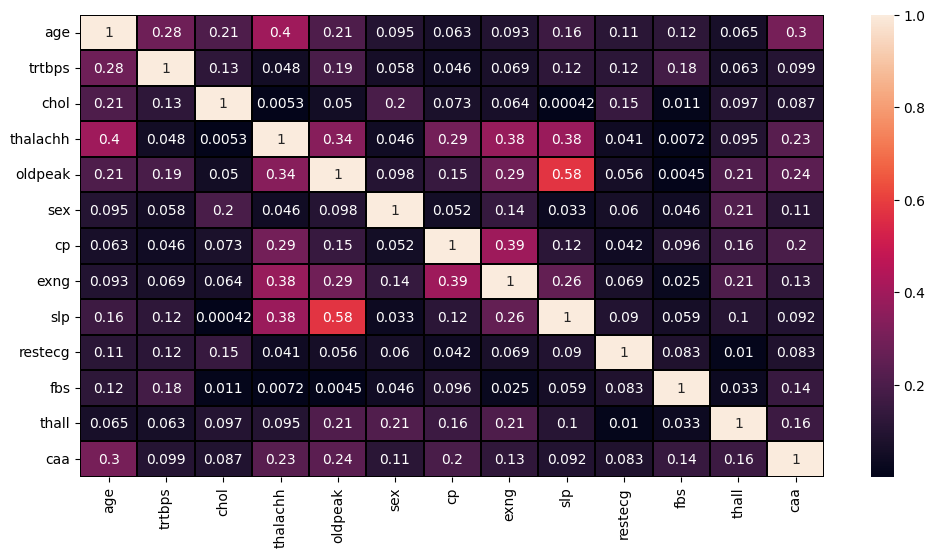

In [14]:
# analyze correlation and remove columns if needed
plt.figure(figsize=(12,6))
corr_matrix = df[columns_con+columns_cat].corr().abs()
sns.heatmap(corr_matrix, linewidths=0.1, linecolor='black', annot=True)
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
if len(to_drop):
    print(f'We are dropping these columns beacause of having high correlation with other column(s): {to_drop}')
    for individual_element_to_drop in to_drop:
        if individual_element_to_drop in columns_cat:
            columns_cat.remove(individual_element_to_drop)
        if individual_element_to_drop in columns_con:
            columns_cat.remove(individual_element_to_drop)

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)
    columns = df.columns.to_list()

<Figure size 3200x3200 with 0 Axes>

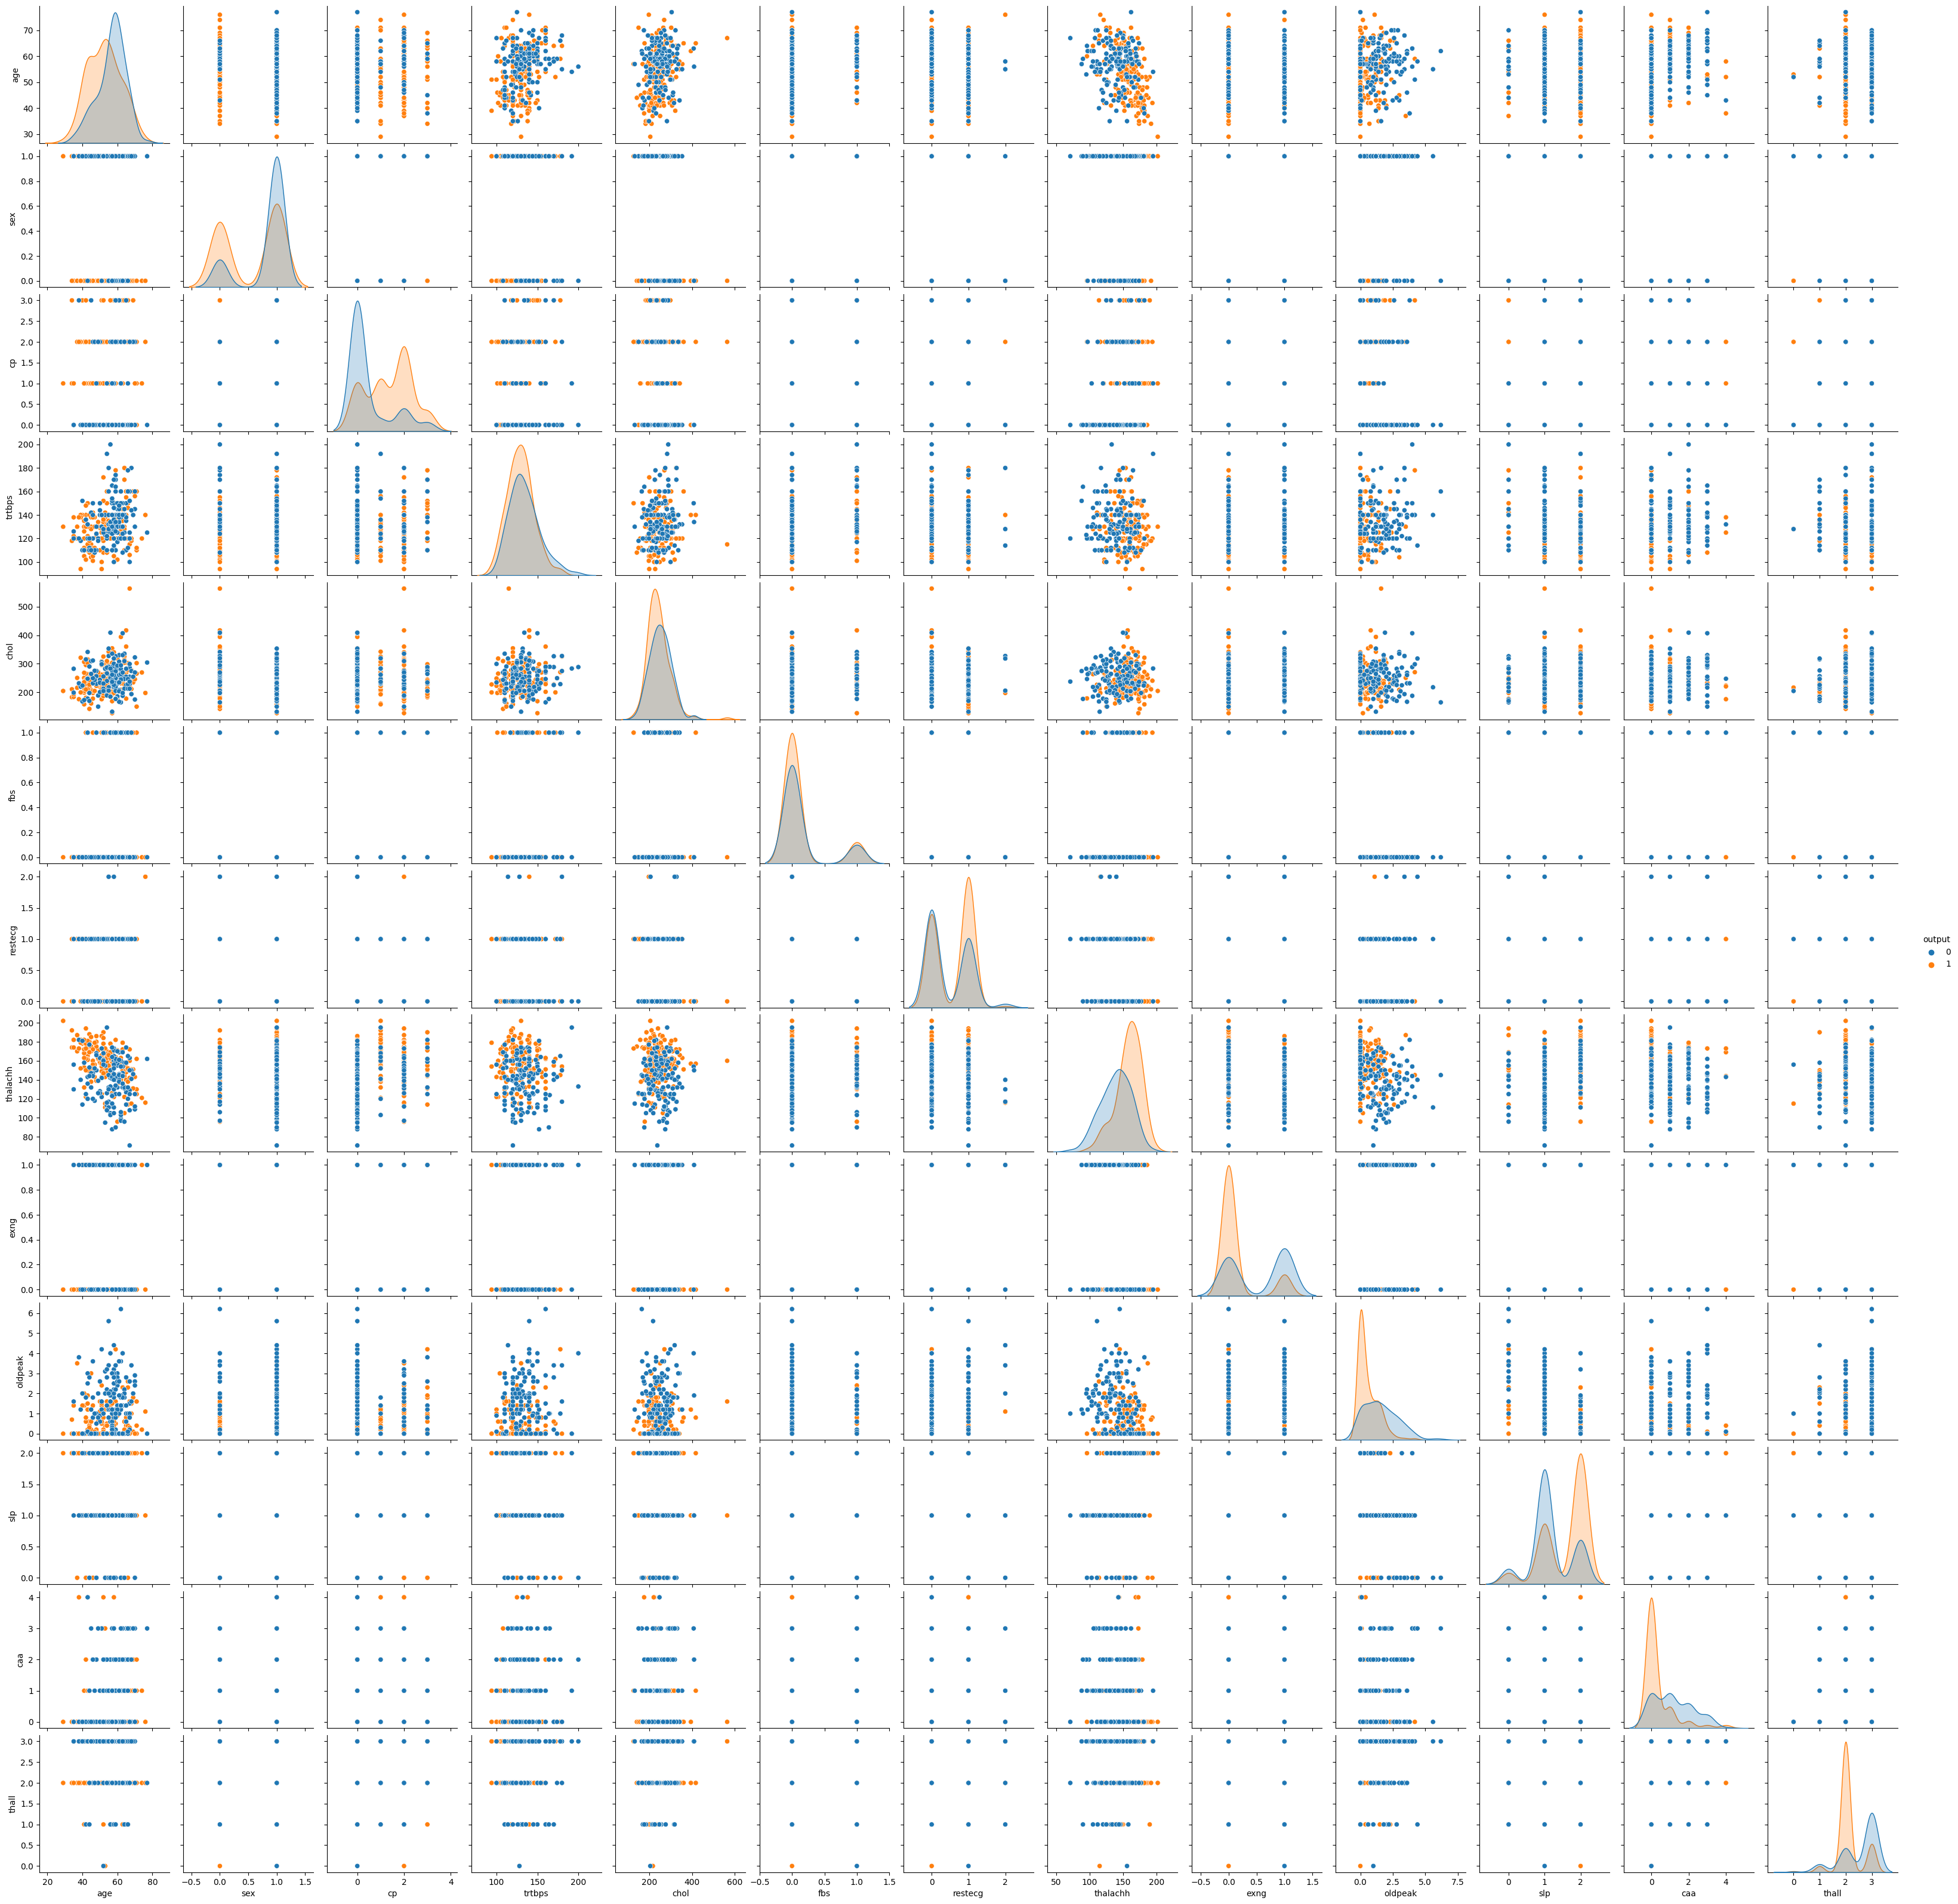

In [15]:
# pairplot
for output in columns_out:
    fig = plt.figure(figsize=(32,32))
    sns.pairplot(df,hue=output)
    plt.show()

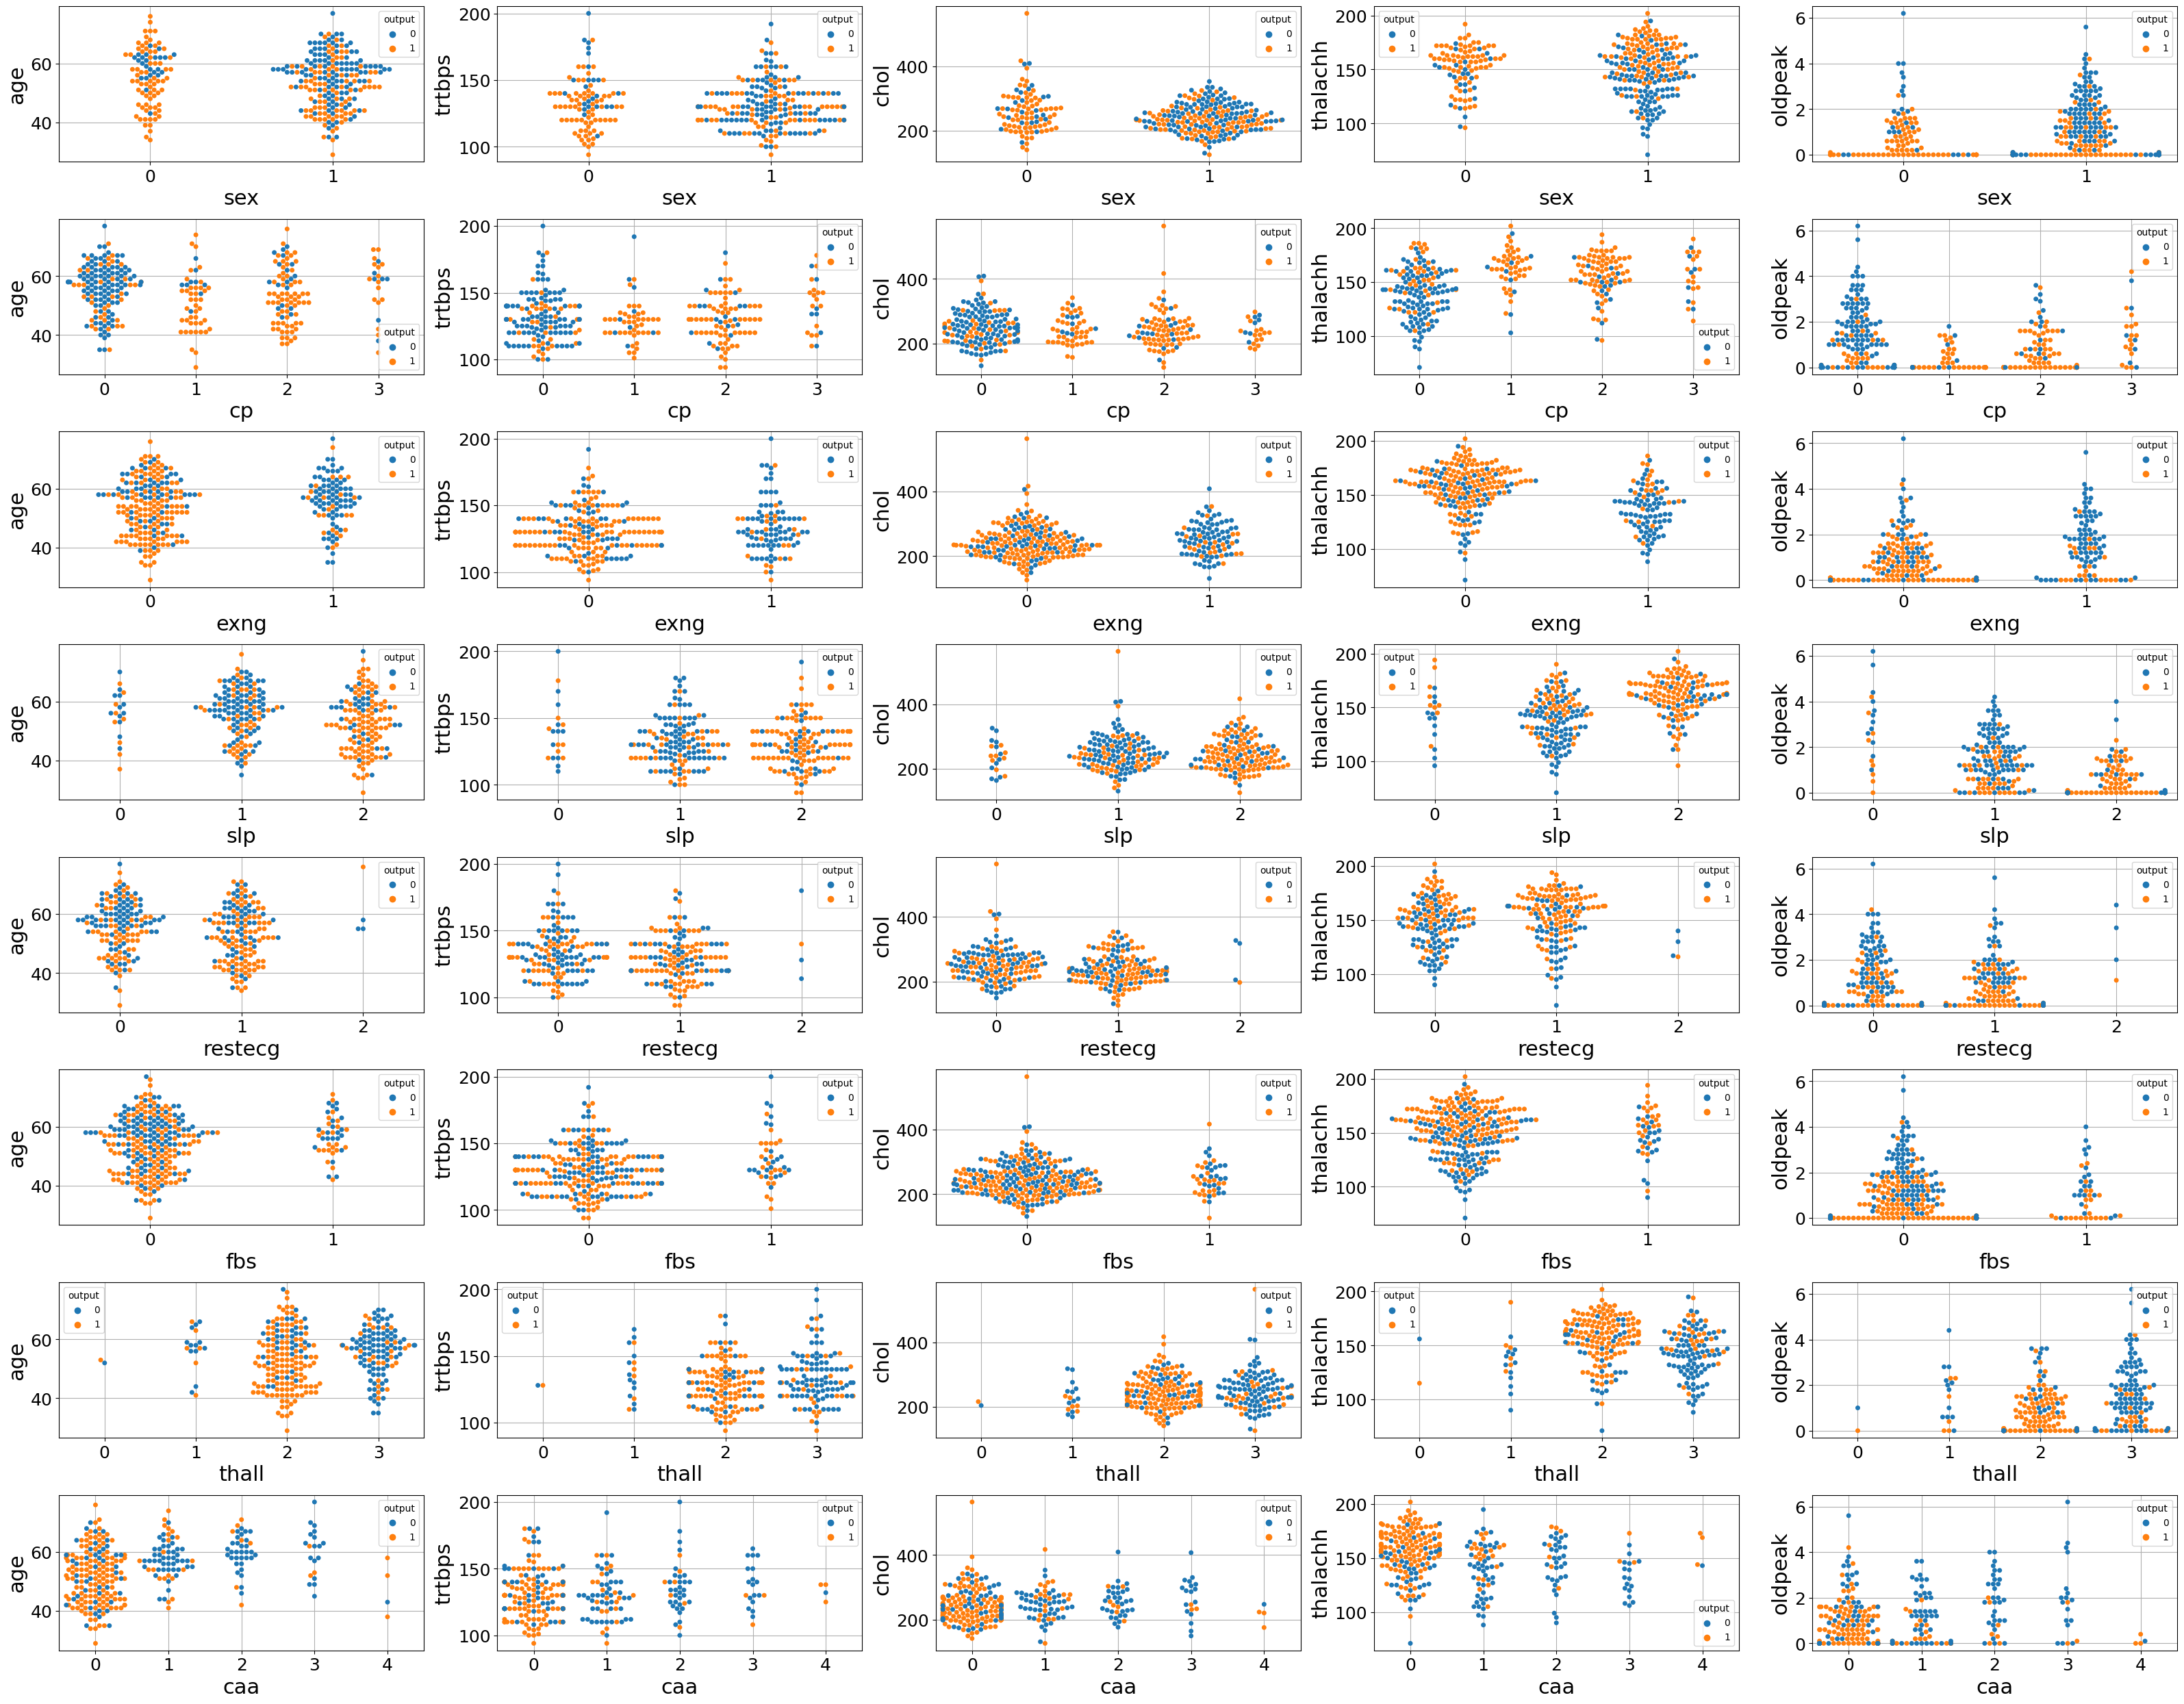

In [16]:
# cat plot 1
fig, axss = plt.subplots(nrows=len(columns_cat), ncols=len(columns_con),  figsize=(4*len(columns_cat), 5*len(columns_con)))
# axss = axs.ravel()
for output in columns_out:
    for i, axs in enumerate(axss):
        for j, ax in enumerate(axs):
            x = columns_cat[i]
            y = columns_con[j]
#             sns.catplot(x=x, y=y,hue=output ,kind="swarm", data=df, ax=ax)
            sns.swarmplot(x=x, y=y,hue=output , data=df, ax=ax)
#             plt.close(2)
            ax.set_xlabel(f'{x}', size = 22)
            ax.set_ylabel(f'{y}', size = 22)
            ax.tick_params(axis='both', which='major', labelsize=18)
            ax.grid()
#             plt.close(4)
    #         ax.legend(fontsize = 18)
    fig.tight_layout()
    plt.show()

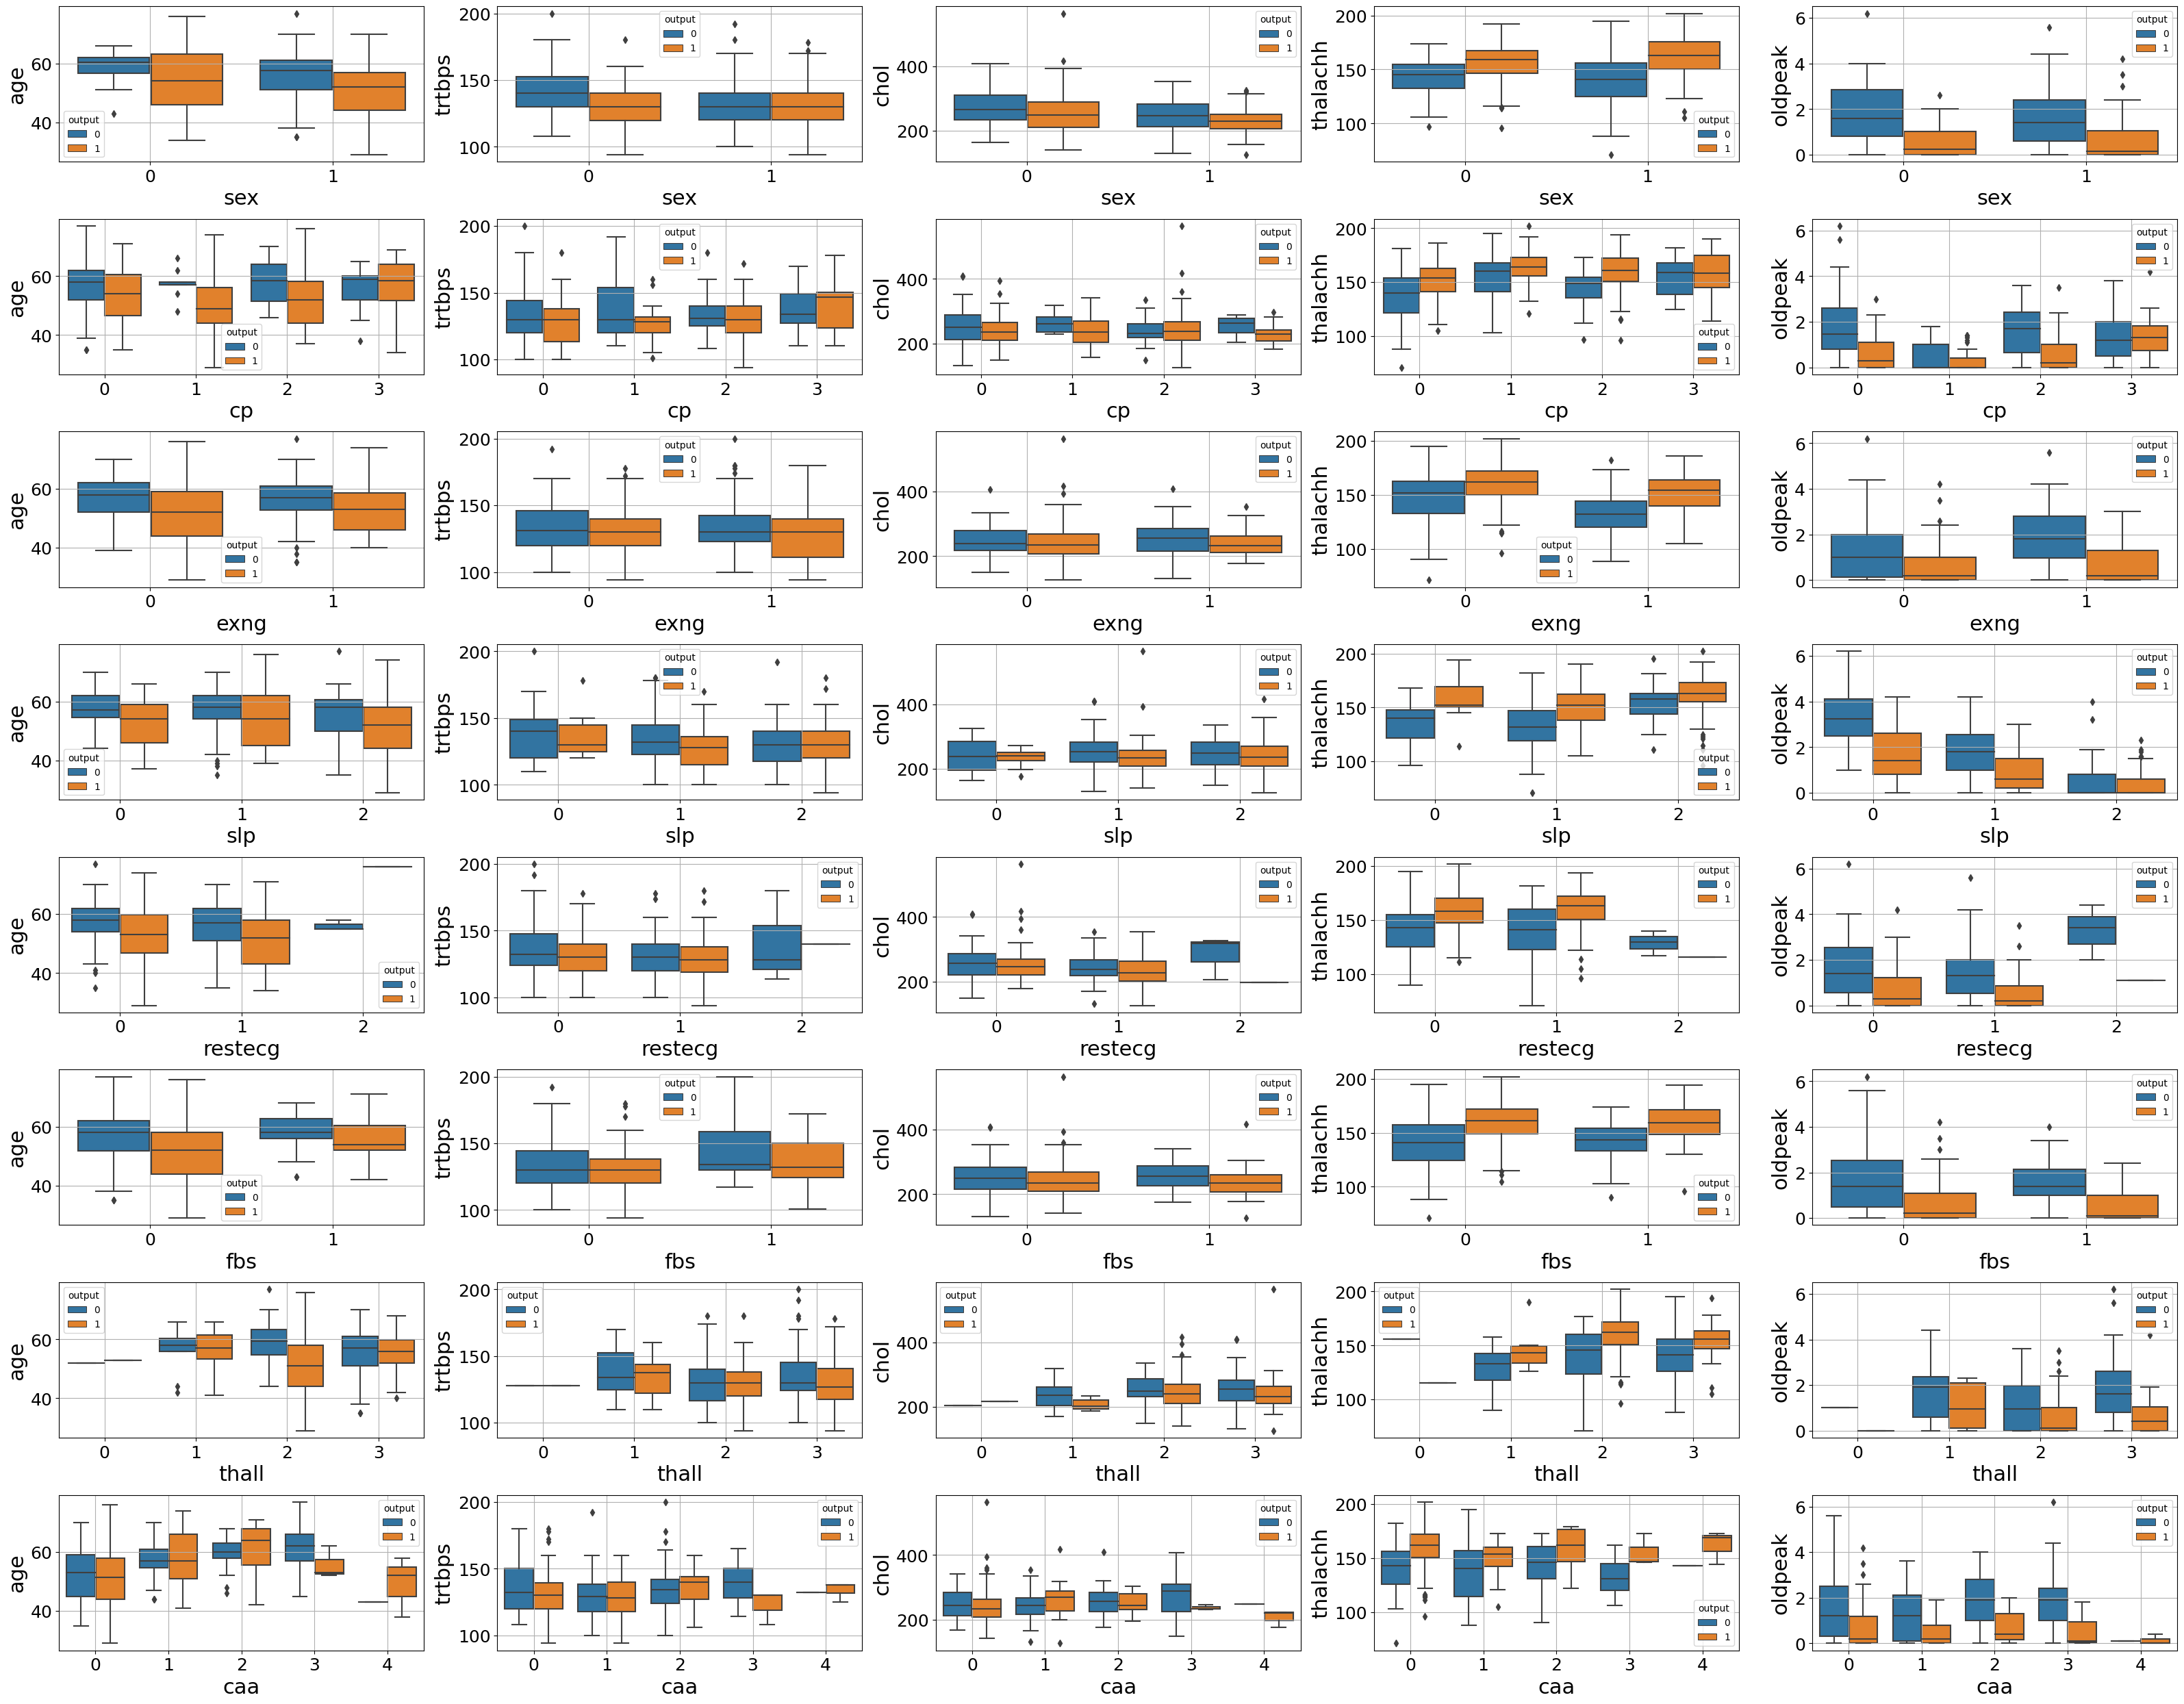

In [17]:
# cat plot 2
fig, axss = plt.subplots(nrows=len(columns_cat), ncols=len(columns_con),  figsize=(4*len(columns_cat), 5*len(columns_con)))
# axss = axs.ravel()
for output in columns_out:
    for i, axs in enumerate(axss):
        for j, ax in enumerate(axs):
            x = columns_cat[i]
            y = columns_con[j]
#             sns.catplot(x=x, y=y,hue=output ,kind="swarm", data=df, ax=ax)
            sns.boxplot(x=x, y=y,hue=output , data=df, ax=ax)
#             plt.close(2)
            ax.set_xlabel(f'{x}', size = 22)
            ax.set_ylabel(f'{y}', size = 22)
            ax.tick_params(axis='both', which='major', labelsize=18)
            ax.grid()
#             plt.close(4)
    #         ax.legend(fontsize = 18)
    fig.tight_layout()
    plt.show()

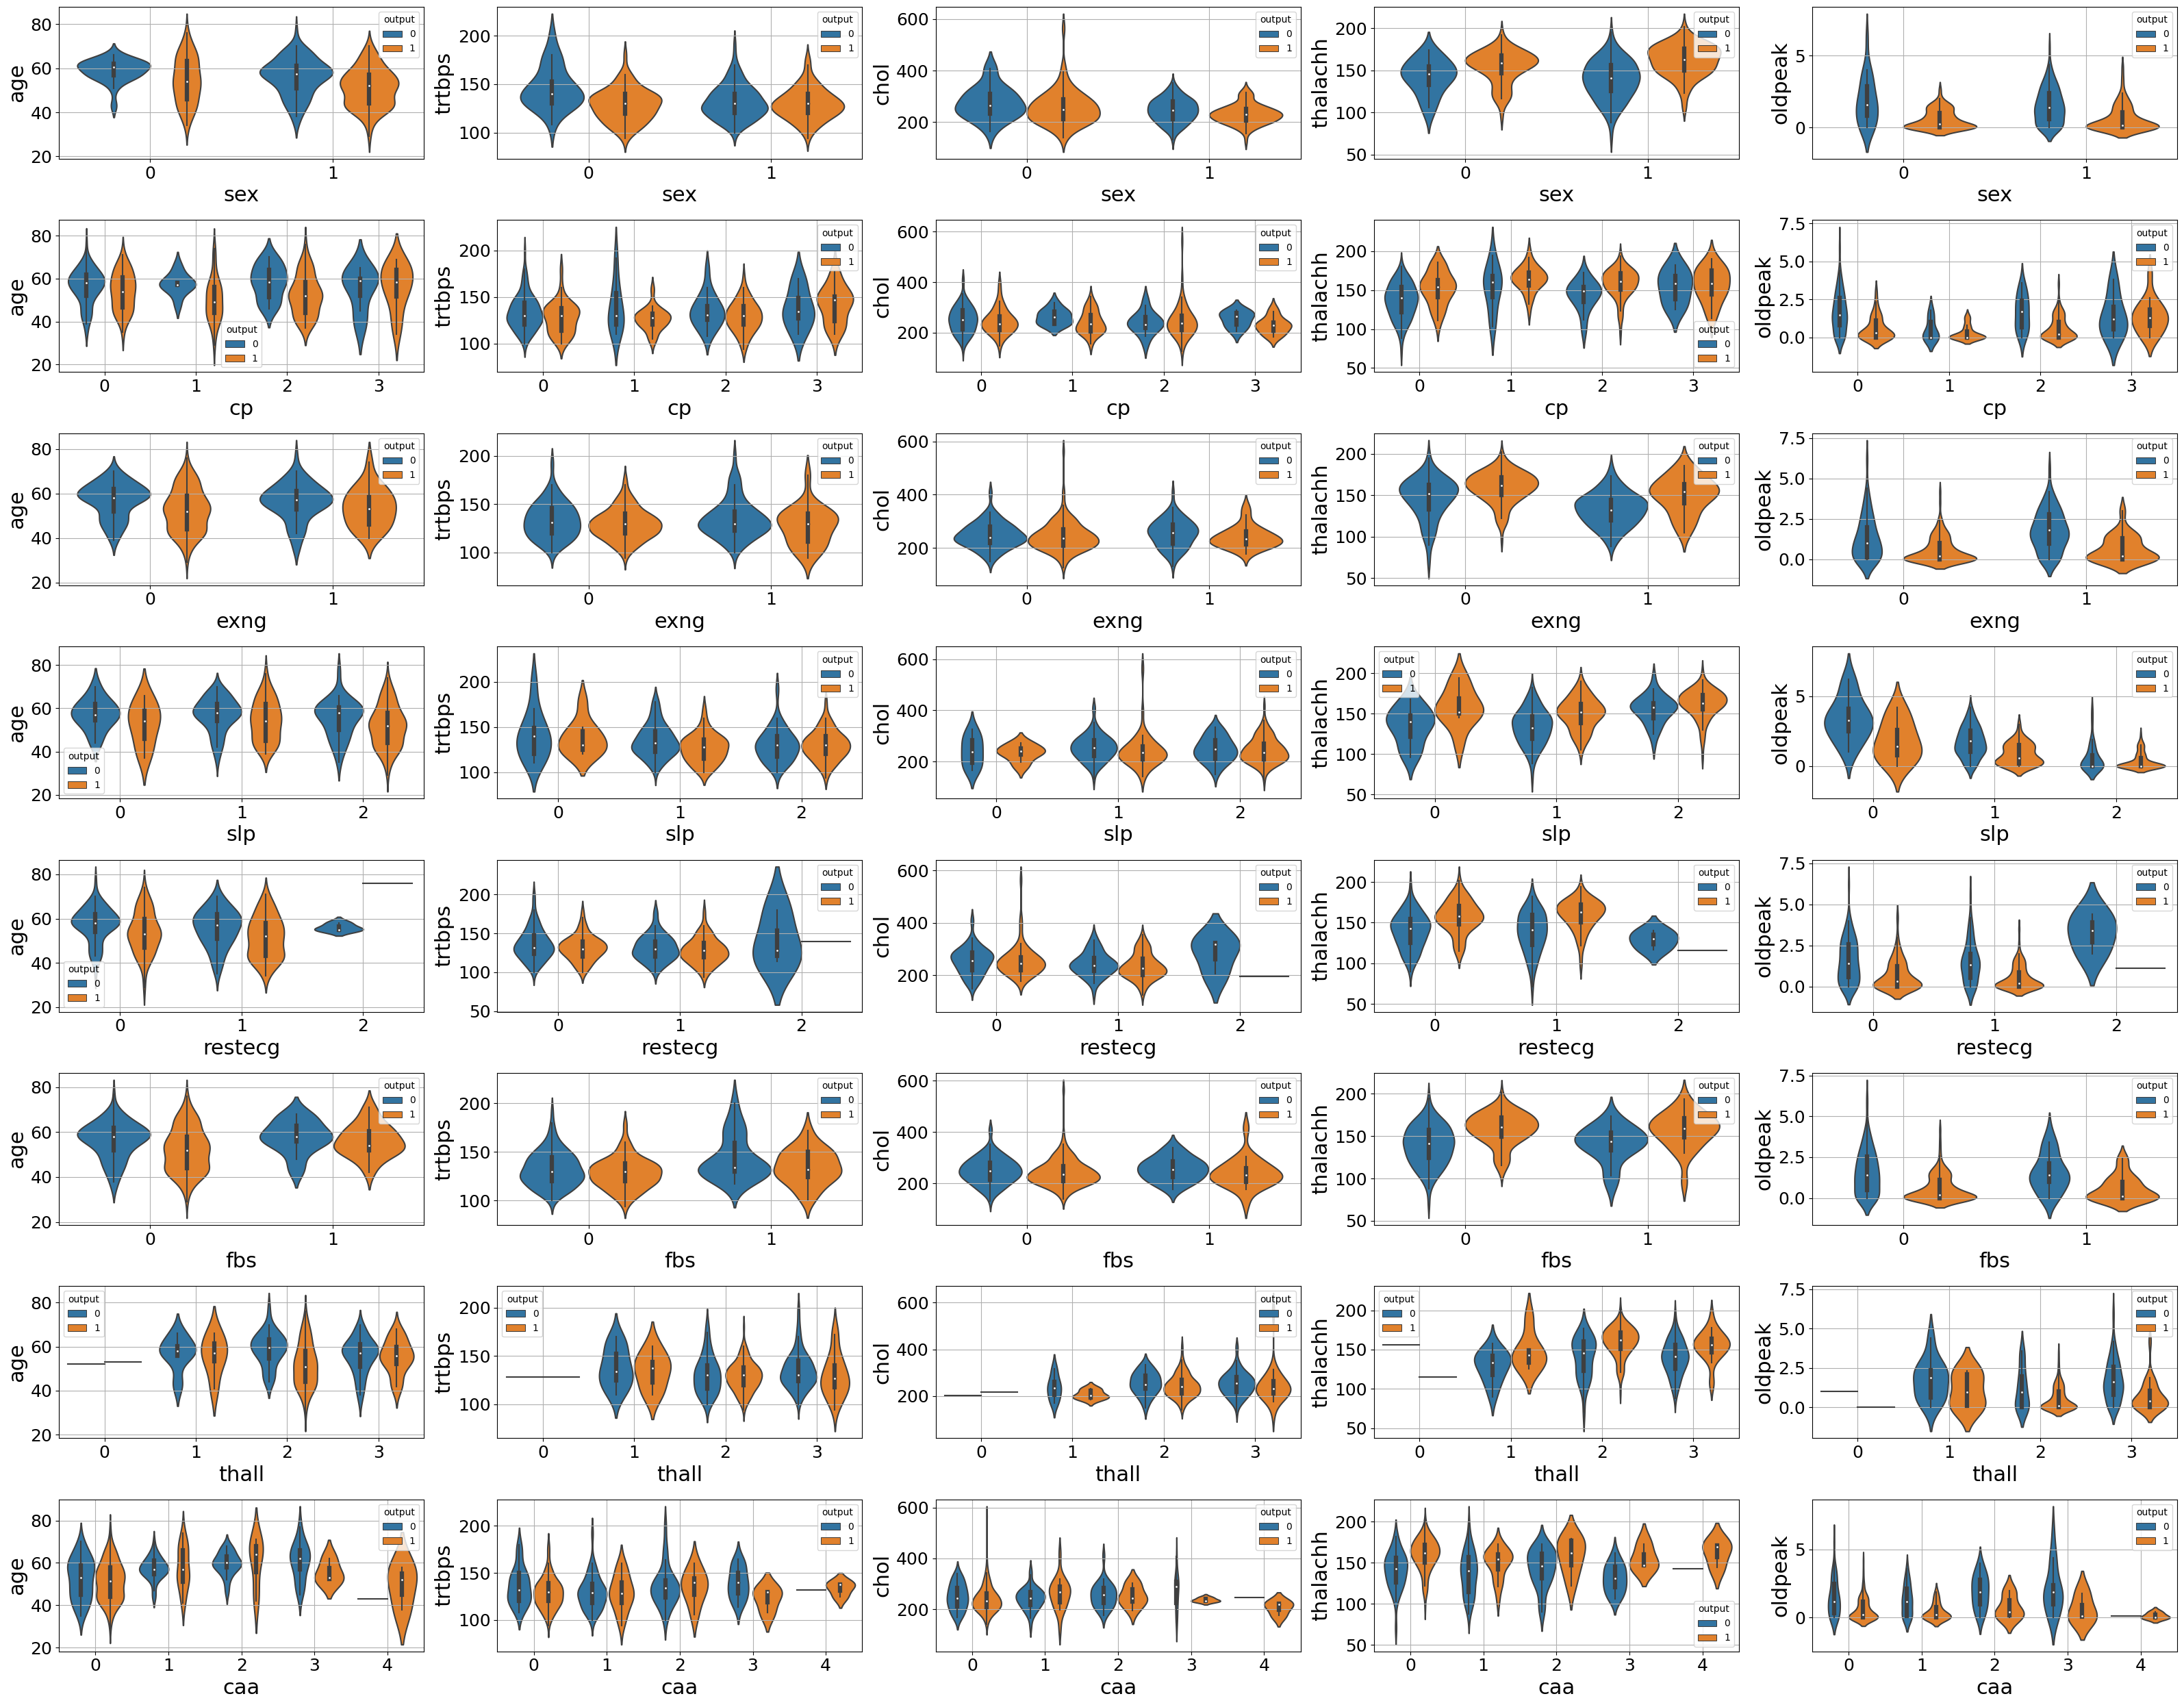

In [18]:
# cat plot 3
fig, axss = plt.subplots(nrows=len(columns_cat), ncols=len(columns_con),  figsize=(4*len(columns_cat), 5*len(columns_con)))
# axss = axs.ravel()
for output in columns_out:
    for i, axs in enumerate(axss):
        for j, ax in enumerate(axs):
            x = columns_cat[i]
            y = columns_con[j]
#             sns.catplot(x=x, y=y,hue=output ,kind="swarm", data=df, ax=ax)
            sns.violinplot(x=x, y=y,hue=output , data=df, ax=ax)
#             plt.close(2)
            ax.set_xlabel(f'{x}', size = 22)
            ax.set_ylabel(f'{y}', size = 22)
            ax.tick_params(axis='both', which='major', labelsize=18)
            ax.grid()
#             plt.close(4)
    #         ax.legend(fontsize = 18)
    fig.tight_layout()
    plt.show()

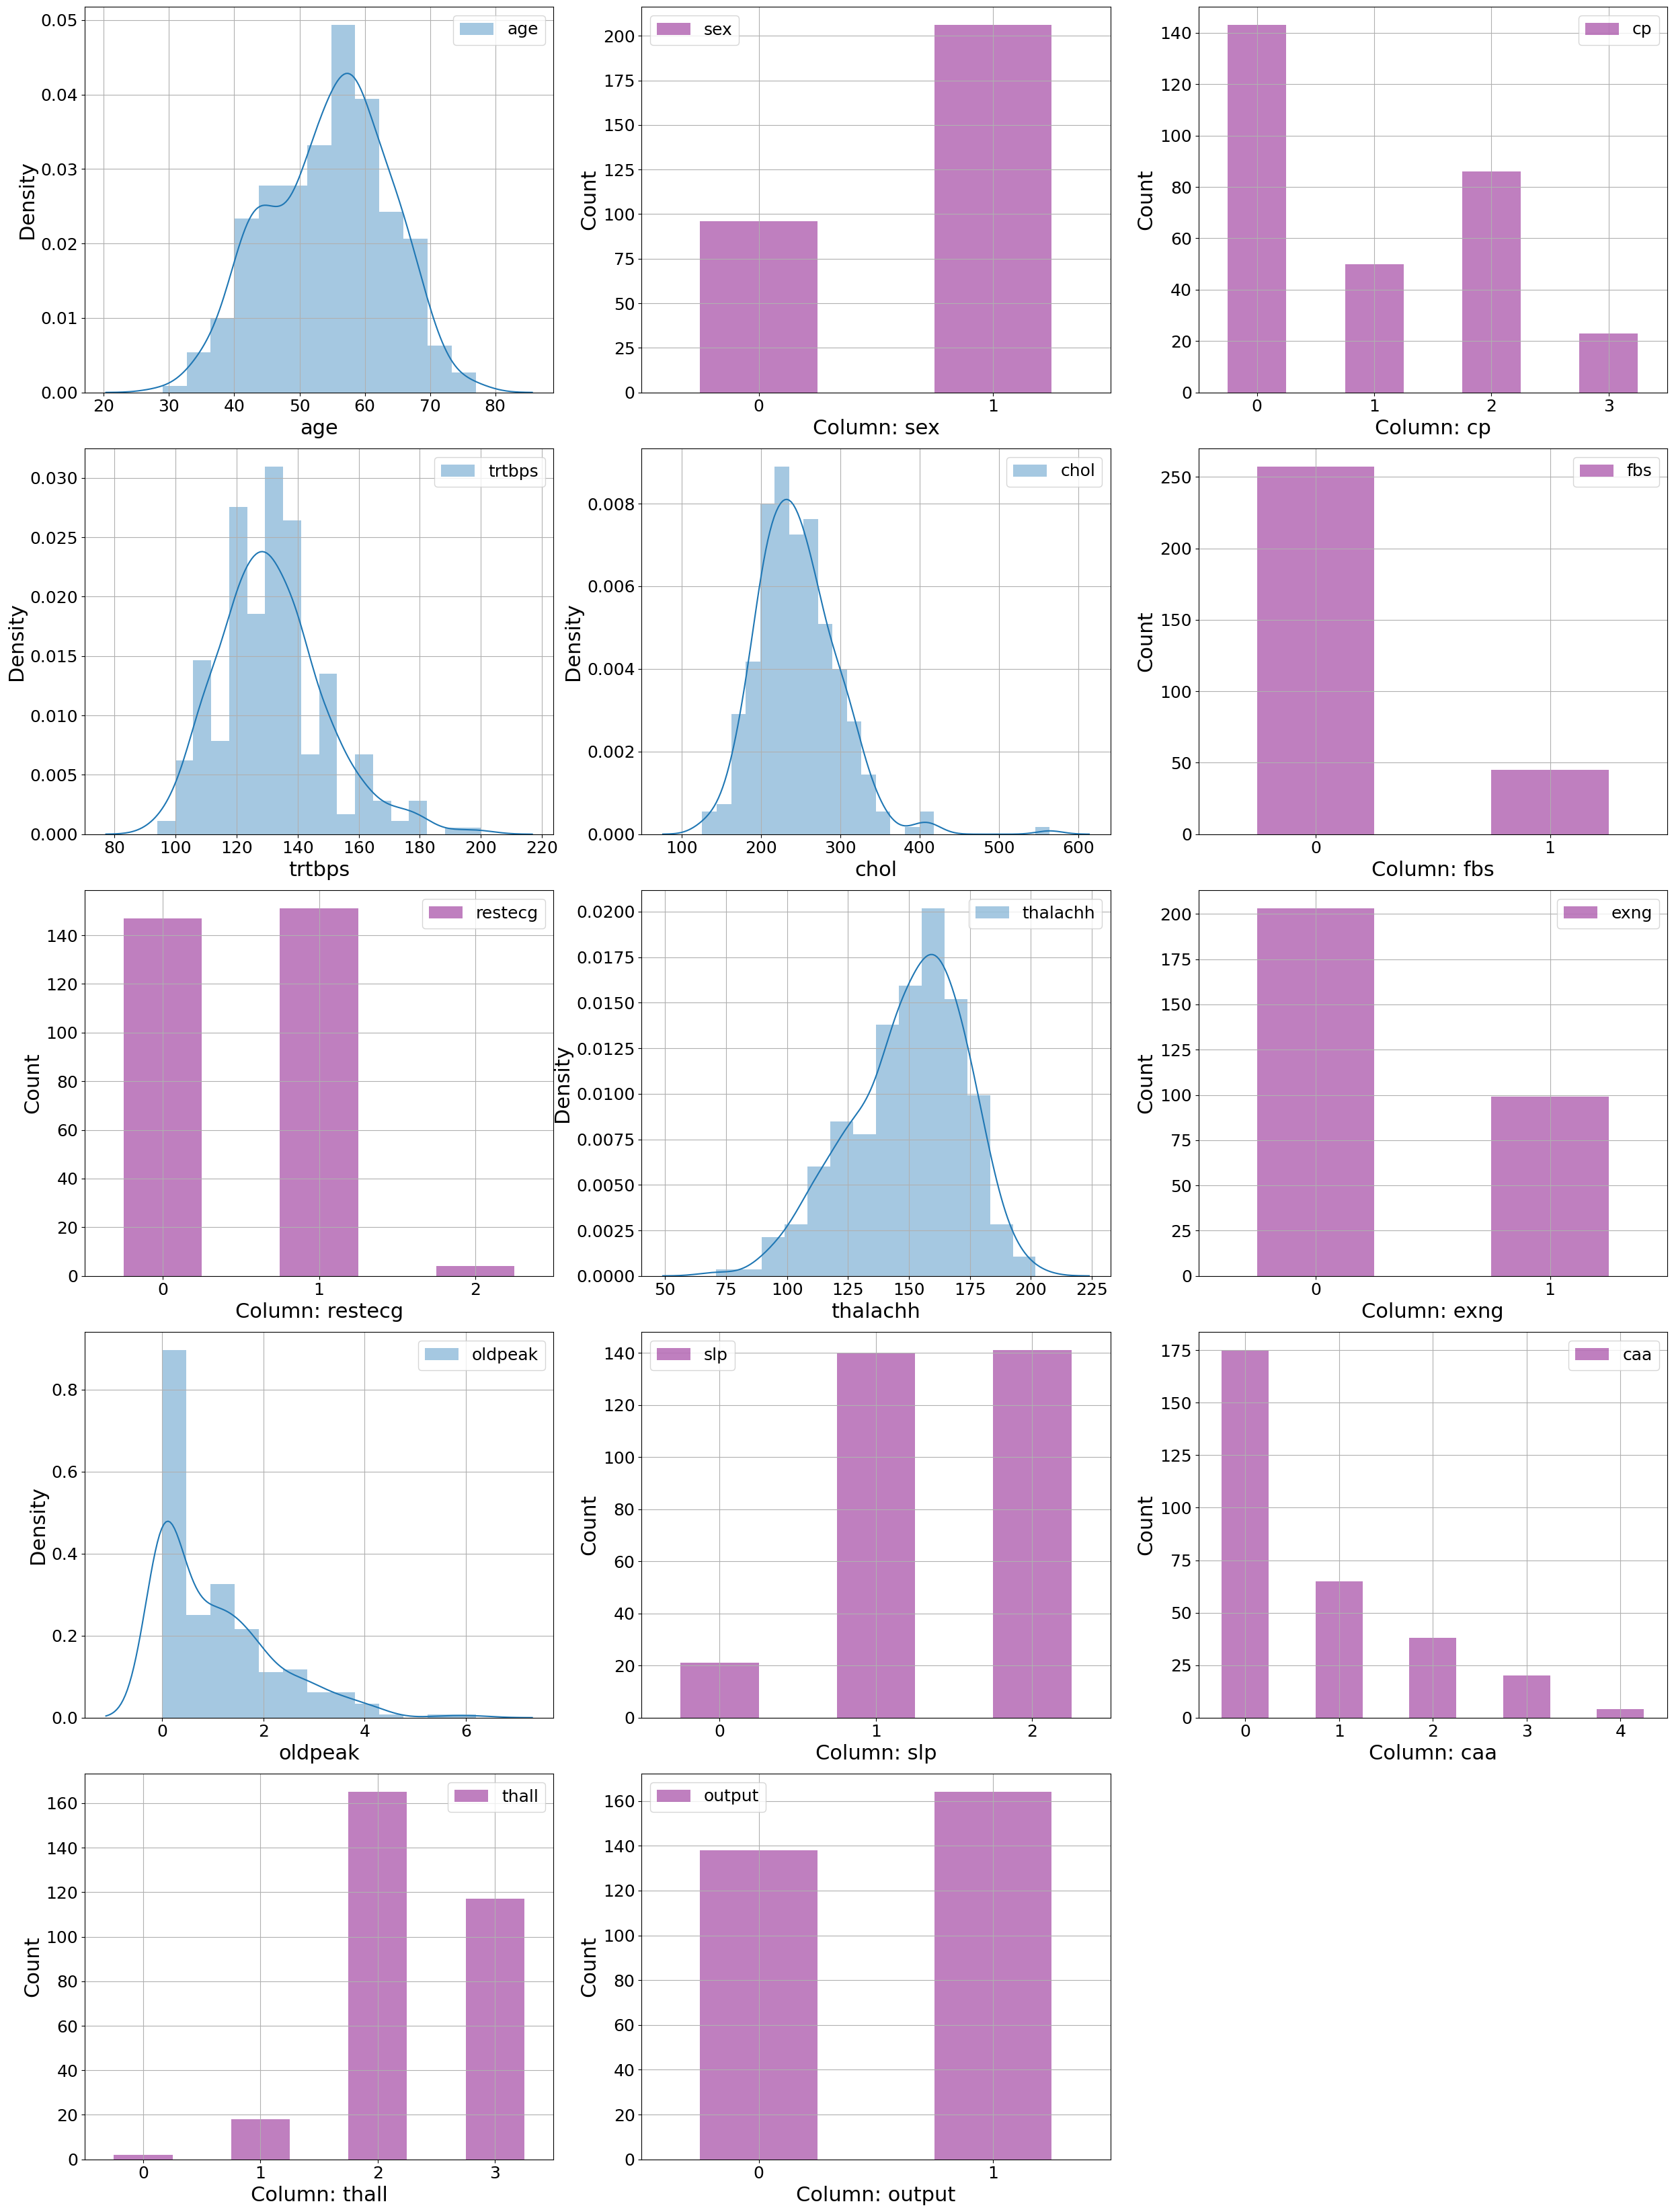

In [19]:
# plot distribution- for categorical variables
# plot density- for continuous variables

fig, axs = plt.subplots(nrows=int(np.ceil(len(columns)/3)), ncols=3,  figsize=(5*int(np.ceil(len(columns)/3)), 33))
axs = axs.ravel()
for i, ax in enumerate(axs[:]):
    try:
#         ax.set_xlabel(f'Values', size=20)
        ax.set_xlabel(f'Column: {columns[i]}', size = 22)
    except:
        ax.axis('off')
        continue
    if columns[i] in columns_con:
        sns.distplot(df[columns[i]], ax=ax, label= columns[i])
        ylabel = 'Density'
    else:
        df[columns[i]].value_counts().sort_index().plot(kind='bar',label=columns[i], ax=ax, alpha=.5, rot=0, color='purple')
        ylabel = 'Count'
    
    ax.set_ylabel(ylabel, size=22)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.grid()
    ax.legend(fontsize = 18)
    
# plt.legend()
fig.tight_layout()
plt.show()

In [20]:
# one hot encoding for categorical variables having more than 2 unique values
to_do_onehot = [col for col in df_unique['columns'] if ((col in columns_cat) & (col in (df_unique[df_unique['unique_count'] > 2]['columns']).tolist()))]
to_do_onehot_output = [col for col in df_unique['columns'] if ((col in columns_out) & (col in (df_unique[df_unique['unique_count'] > 2]['columns']).tolist()))]

print(f'columns that need one-hot encoding: {to_do_onehot}')

def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    new_cols = []
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        new_cols+=dummies.columns.to_list()
    return df, new_cols

df, columns_onehot = one_hot(df, to_do_onehot)
df, columns_onehot_output = one_hot(df, to_do_onehot_output)

columns that need one-hot encoding: ['cp', 'restecg', 'slp', 'caa', 'thall']


In [21]:
# prepare train and test data
from sklearn.model_selection import train_test_split
columns_X = list(set(columns_con+columns_cat+columns_onehot)-set(to_do_onehot))
columns_y = list(set(columns_out+columns_onehot_output)-set(to_do_onehot_output))
# TODO: split the X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(df[columns_X], df[columns_y], test_size=0.2, random_state= 123)
X_train.reset_index(drop= True, inplace= True)
X_test.reset_index(drop= True, inplace= True)
y_train.reset_index(drop= True, inplace= True)
y_test.reset_index(drop= True, inplace= True)
print(X_train.shape, X_test.shape)

(241, 27) (61, 27)


In [22]:
X_train.columns

Index(['oldpeak', 'exng', 'restecg_0', 'cp_2', 'slp_0', 'caa_4', 'thall_0',
       'caa_2', 'thall_1', 'fbs', 'caa_3', 'caa_1', 'slp_1', 'sex', 'thalachh',
       'restecg_2', 'trtbps', 'slp_2', 'caa_0', 'thall_3', 'chol', 'restecg_1',
       'cp_1', 'thall_2', 'cp_0', 'age', 'cp_3'],
      dtype='object')

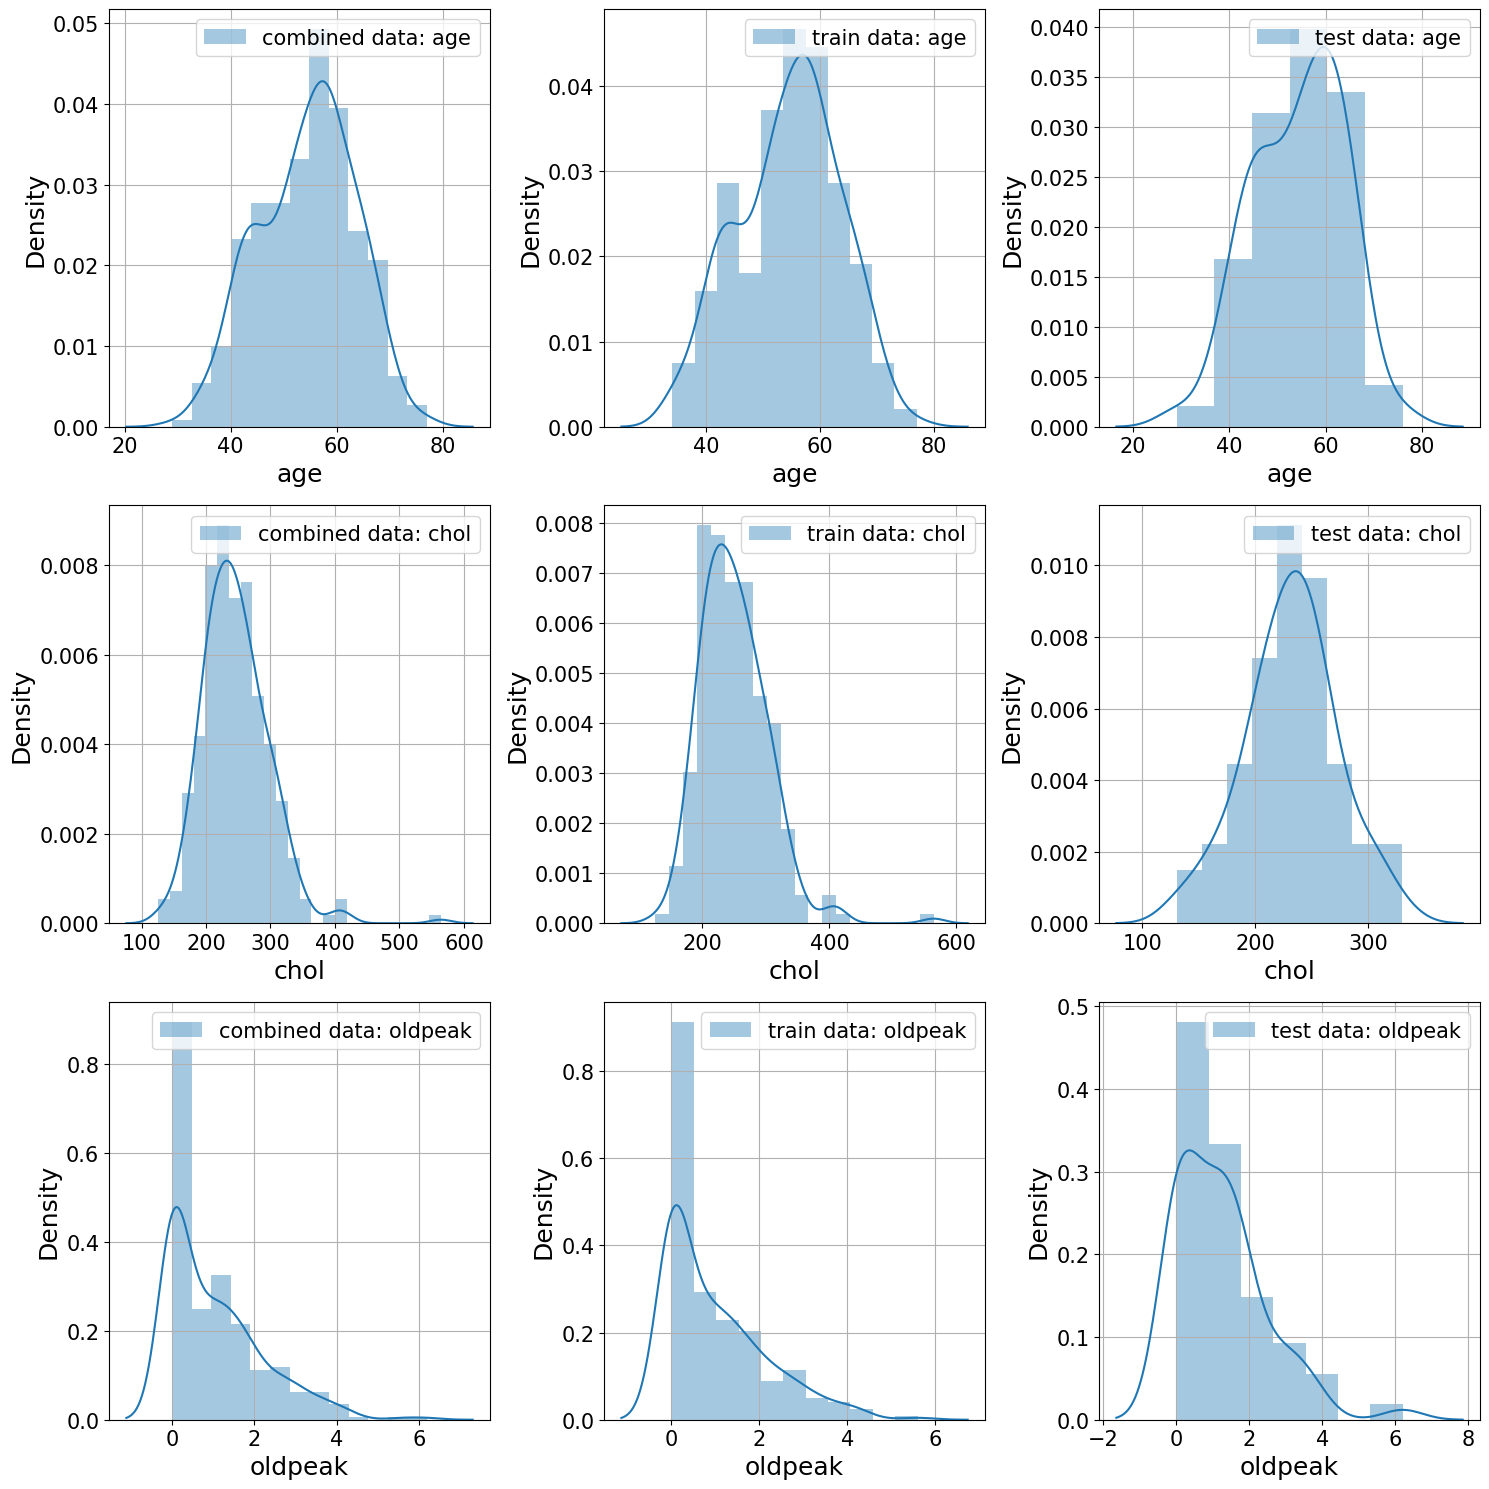

In [23]:
# show histograms of some variables on train and test data
import random
random.seed(123)

columns_sample = random.sample(columns_con, 3)

fig, axss = plt.subplots(nrows= len(columns_sample), ncols=3,  figsize=(15,5*len(columns_sample)))

for i, axs in enumerate(axss):
    x1 = df[columns_sample[i]]
    x2 = X_train[columns_sample[i]]
    x3 = X_test[columns_sample[i]]
    sb1 = sns.distplot(x1, ax=axs[0], label= f'combined data: {columns_sample[i]}')
    sns.distplot(x2, ax=axs[1], label= f'train data: {columns_sample[i]}')
    sns.distplot(x3, ax=axs[2], label= f'test data: {columns_sample[i]}')
    ylabel = f'Density'
    for j, ax in enumerate(axs):
        ax.set_ylabel(ylabel, size=18)
        ax.set_xlabel(f'{columns_sample[i]}', size=18)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.grid()
        ax.legend(fontsize = 15, loc = 1)
        
fig.tight_layout()
plt.show()

In [24]:
X_train_con = X_train[columns_con].copy()
col_train_cat = list(set(X_train.columns.tolist())-set(X_train_con.columns.tolist()))
X_train_cat = X_train[col_train_cat].copy()
X_test_con = X_test[columns_con].copy()
X_test_cat = X_test[col_train_cat].copy()

In [25]:
# standardize the dataset
from sklearn.preprocessing import StandardScaler
# TODO: define a scaler and use the training dataset to fit the scaler

scaler = StandardScaler()
scaler.fit(X_test_con);

# TODO: print out the mean and variance of each feature, obtained from the scaler.
[print(f'feature: {x[0]:25s} mean: {x[1]:7.02f} {(" ")*5} variance: {x[2]: 9.02f}') for x in zip(columns_con, scaler.mean_, scaler.var_)];

# TODO: then transfer the raw data to scaled data (for both training and testing dataset)
X_train_con_scaled = pd.DataFrame(scaler.transform(X_train_con), columns = columns_con)
X_test_con_scaled = pd.DataFrame(scaler.transform(X_test_con), columns = columns_con)

X_train = pd.concat([X_train_cat, X_train_con_scaled], axis=1)
X_test = pd.concat([X_test_cat, X_test_con_scaled], axis=1)

feature: age                       mean:   54.30       variance:     88.60
feature: trtbps                    mean:  130.49       variance:    367.27
feature: chol                      mean:  232.30       variance:   1636.47
feature: thalachh                  mean:  146.59       variance:    462.93
feature: oldpeak                   mean:    1.21       variance:      1.53


In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

# list the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [182]:
key = []
value = []
model_family = []
random_state = 123

## LogisticRegression
name = 'LogReg'
count = 1
for c in [0.01, 0.1, 1.0, 10]:
    for tol in [1e-4, 1e-3, 1e-2, 1e-1]:
        key.append(f'{name}_{count}')
        count += 1
        value.append(LogisticRegression(random_state=random_state, C = c, tol = tol))

## KNeighborsClassifier
name = 'KNN'
count = 1
for p in [1,2,3,4]:
    for n_neighbors in [3,5,7,9]:
        key.append(f'{name}_{count}')
        count += 1
        value.append(KNeighborsClassifier(n_neighbors= n_neighbors, p = p))

## SVC
name = 'SVC'
count = 1
for c in [0.1, 1.0, 10]:
    for tol in [1e-4, 1e-3, 1e-2, 1e-1]:
        for deg in [2, 3]:
            key.append(f'{name}_{count}')
            count += 1
            value.append(SVC(random_state=random_state, C = c, tol = tol, degree = deg))

In [183]:
key += ['DT','RF','GradBoost','XGB', 'AdaBoost']
value += [DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), xgb.XGBClassifier(), AdaBoostClassifier()]
models = dict(zip(key,value))

In [184]:
models

{'LogReg_1': LogisticRegression(C=0.01, random_state=123),
 'LogReg_2': LogisticRegression(C=0.01, random_state=123, tol=0.001),
 'LogReg_3': LogisticRegression(C=0.01, random_state=123, tol=0.01),
 'LogReg_4': LogisticRegression(C=0.01, random_state=123, tol=0.1),
 'LogReg_5': LogisticRegression(C=0.1, random_state=123),
 'LogReg_6': LogisticRegression(C=0.1, random_state=123, tol=0.001),
 'LogReg_7': LogisticRegression(C=0.1, random_state=123, tol=0.01),
 'LogReg_8': LogisticRegression(C=0.1, random_state=123, tol=0.1),
 'LogReg_9': LogisticRegression(random_state=123),
 'LogReg_10': LogisticRegression(random_state=123, tol=0.001),
 'LogReg_11': LogisticRegression(random_state=123, tol=0.01),
 'LogReg_12': LogisticRegression(random_state=123, tol=0.1),
 'LogReg_13': LogisticRegression(C=10, random_state=123),
 'LogReg_14': LogisticRegression(C=10, random_state=123, tol=0.001),
 'LogReg_15': LogisticRegression(C=10, random_state=123, tol=0.01),
 'LogReg_16': LogisticRegression(C=10, r

In [185]:
# amit

In [192]:
t1 = time.time()
prediction_acc =[]
mean_training_scores = []
trained_models = []
training_time = []
auc = []

# train the models and get prediction accuracy
for name,algo in models.items():
    # record start time
    start = time.time()
    model=algo
    model.fit(X_train,y_train)
    temp_time = (time.time()-start) * 1000
    training_time.append(temp_time)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    temp_auc = roc_auc_score(y_test, predict)
    prediction_acc.append(acc)
    auc.append(temp_auc)
    trained_models.append(model)
    mean_training_score = np.mean(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5))
    mean_training_scores.append(mean_training_score)
    print(f'model: {name:15s} mean_training_score: {mean_training_score:.5f} {(" ")*4} prediction_acc: {acc:.5f} {(" ")*6} time: {temp_time:.2f} ms {(" ")*4} AUC: {temp_auc:.2f}')
#     print(name,acc)
#     print(f'{name:25s}')
t2 = time.time()
print(f'time taken: {(t2-t1)*1000} ms')

model: LogReg_1        mean_training_score: 0.80085      prediction_acc: 0.77049        time: 7.16 ms      AUC: 0.77
model: LogReg_2        mean_training_score: 0.80085      prediction_acc: 0.77049        time: 4.68 ms      AUC: 0.77
model: LogReg_3        mean_training_score: 0.80085      prediction_acc: 0.77049        time: 3.45 ms      AUC: 0.77
model: LogReg_4        mean_training_score: 0.80085      prediction_acc: 0.77049        time: 2.97 ms      AUC: 0.77
model: LogReg_5        mean_training_score: 0.86318      prediction_acc: 0.78689        time: 4.43 ms      AUC: 0.79
model: LogReg_6        mean_training_score: 0.86318      prediction_acc: 0.78689        time: 4.32 ms      AUC: 0.79
model: LogReg_7        mean_training_score: 0.86318      prediction_acc: 0.78689        time: 3.79 ms      AUC: 0.79
model: LogReg_8        mean_training_score: 0.85910      prediction_acc: 0.78689        time: 5.43 ms      AUC: 0.79
model: LogReg_9        mean_training_score: 0.85068      predict

In [198]:
prediction_acc_df = pd.DataFrame()
prediction_acc_df['model'] = key
prediction_acc_df['model_family'] = [k.split('_')[0] for k in key]
prediction_acc_df['accuracy_test'] = prediction_acc
prediction_acc_df['training_time'] = training_time
prediction_acc_df['AUC'] = auc
prediction_acc_df.sort_values(by= ['accuracy_test'], ascending= False, inplace= True)
prediction_acc_df.set_index(['model', 'training_time', 'AUC'], inplace= True)
prediction_acc_df.drop_duplicates(inplace= True)
prediction_acc_df.reset_index(inplace= True, drop= False)
prediction_acc_df.head(10)

model  training_time       AUC model_family  accuracy_test
0    KNN_11       1.774073  0.869355          KNN       0.868852
1    KNN_15       1.595736  0.836022          KNN       0.836066
2     KNN_5       1.559019  0.819355          KNN       0.819672
3     KNN_9       1.978874  0.803226          KNN       0.803279
4     SVC_3       3.242970  0.787097          SVC       0.786885
5     KNN_8       1.809835  0.787097          KNN       0.786885
6  LogReg_5       4.432917  0.786559       LogReg       0.786885
7  LogReg_2       4.678011  0.770968       LogReg       0.770492
8  AdaBoost      65.954924  0.770430     AdaBoost       0.770492
9     KNN_4       2.099037  0.770430          KNN       0.770492

In [199]:
prediction_acc_df.shape

(17, 5)

In [200]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

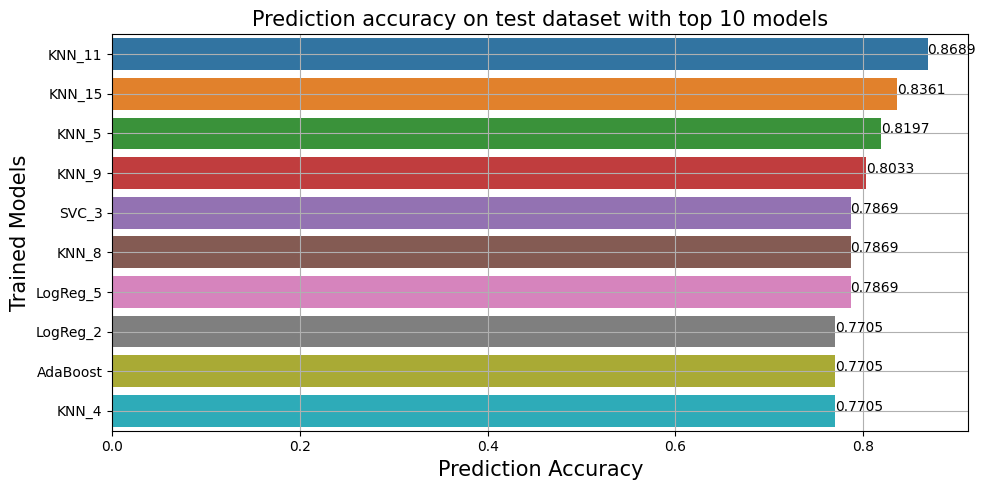

In [201]:
## best 10 models

fig = plt.figure(figsize = (10,5))
# ax = sns.barplot(x = prediction_acc, y = key, palette='pastel')
ax = sns.barplot(x = prediction_acc_df['accuracy_test'][:10], y = prediction_acc_df['model'][:10])
show_values(ax, "h", space=0)

plt.title('Prediction accuracy on test dataset with top 10 models', fontsize = 15)
plt.xlabel('Prediction Accuracy', fontsize = 15)
plt.ylabel('Trained Models', fontsize = 15)
plt.grid()
fig.tight_layout()
plt.show()

In [202]:
# select the best model
print("Highest prediction_acc: {}".format(max(prediction_acc)))
print(f"Best model: {key[prediction_acc.index(max(prediction_acc))]}", trained_models[prediction_acc.index(max(prediction_acc))].get_params())

Highest prediction_acc: 0.8688524590163934
Best model: KNN_10 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}


Accuracy: 0.8689
Precision: 0.8667
Recall: 0.8667
F1 Score: 0.8667
Sensitivity: 0.8667
Specificity: 0.8710
Missclassification: 0.1311


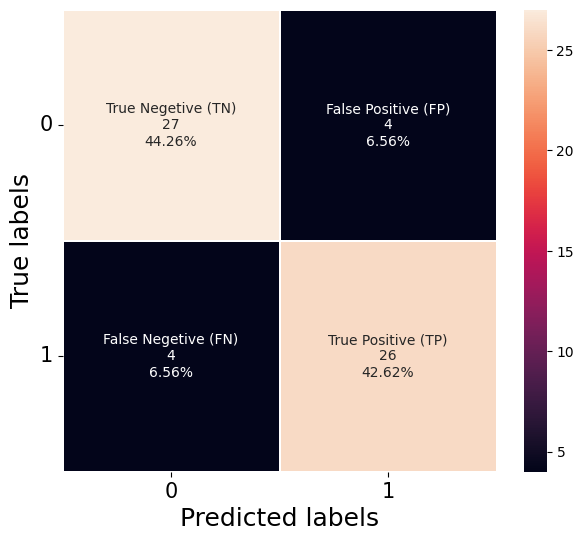

In [203]:
#confusion matrix
trained_model = trained_models[prediction_acc.index(max(prediction_acc))]
y_pred = trained_model.predict(X_test)
cf_matrix=confusion_matrix(y_test,y_pred)

(TN, FP, FN, TP) = cf_matrix.ravel()
accuracy = (TN+TP)/float(TN+FP+TP+FN)
precision = TP / float(TP+FP)
recall = TP / float(TP+FN)
f1score = 2*precision*recall/float(precision+recall)
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
Missclassification = 1-accuracy

print(f'Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1score:.4f}\nSensitivity: {sensitivity:.4f}\nSpecificity: {specificity:.4f}\nMissclassification: {Missclassification:.4f}')

plt.figure(figsize=(7,6))

group_names = ['True Negetive (TN)','False Positive (FP)','False Negetive (FN)','True Positive (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=0.1, linecolor='white')

# sns.heatmap(cf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted labels', fontsize = 18)
plt.ylabel('True labels', fontsize = 18)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15, rotation=0)
plt.show()


references:
    1. https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?datasetId=1226038&searchQuery=eda
    2. https://www.kaggle.com/code/harshsharma511/beginner-notebook-eda-svc-93-accuracy
    3. https://www.kaggle.com/code/namanmanchanda/heart-attack-eda-prediction-90-accuracy
    4. https://www.kaggle.com/code/kaamraankhan/heart-attack-eda#Correlation-among-attributes
    5. https://www.kaggle.com/code/vipin20/heart-attack-analysis-prediction-eda#model-building